In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
base = pd.read_csv("clean_base111.csv", encoding="latin-1")

# Data volumetry

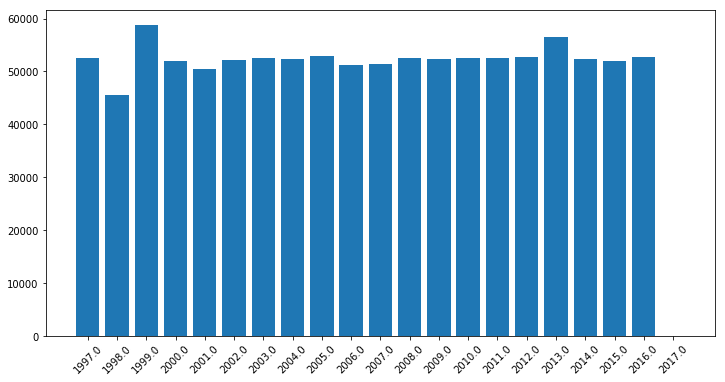

In [5]:
volumetry = base.groupby('Ano').agg({'Dia Juliano': 'count'}).reset_index()

fig = plt.figure(figsize=(12, 6))
# plt.title("Volumetria base original")
N = np.arange(len(volumetry['Dia Juliano']))
plt.bar(N,volumetry['Dia Juliano'].values)
plt.xticks(N,volumetry['Ano'],rotation = 45)
# plt.savefig("CEPAGRI_volumetria_nomiss")
plt.show()

# Better interval to the main variables

1°) Temperatura do Ar (°C) - Air temperature

2°) Umidade relativa (%) - Air moisture

3°) Pressão (hPa) - Pression

4°) Direção do vento - Wind direction

In [6]:
#Defining functions to check data volumetry and variables intervals

#Function to check volumetry
def volumetry(data,safra, savefig='none', savefig_check = False):
    print("The full volumetry is ", data.shape[0])
    
    base_vol = data.groupby(safra).agg({'Cod': 'count'}).reset_index()
    
    print("\nThe volumetry per month is ", base_vol.Cod.mean())
    
    Anos = base[safra].unique()
    Anos.sort()
    
    if(savefig_check == False):
        fig = plt.figure(figsize=(14, 5))
        plt.bar(np.arange(len(Anos)), base_vol.Cod)
        plt.xticks(np.arange(len(Anos)), Anos, rotation = 45)
        plt.show()
    else:
        fig = plt.figure(figsize=(14, 5))
        plt.bar(np.arange(len(Anos)), base_vol.Cod)
        plt.xticks(np.arange(len(Anos)), Anos, rotation = 45)
        plt.savefig(savefig)
        plt.show()

#Function to check variable intervals
def info_var(data, var):
    
    mean_ = data[var].mean()
    min_ = data[var].min()
    max_ = data[var].max()
    std_ = data[var].std()
    
    print(f"The variable {var} mean is {mean_} +- {std_} \nThe min is {min_} and the maxi is {max_}")

## Air temperature 

In [7]:
base_v1 = base.loc[(base['Temperatura do Ar Média (°C)'] > -2) & (base['Temperatura do Ar Média (°C)'] < 45), :]

In [8]:
#Variable intervals before
info_var(base,'Temperatura do Ar Média (°C)')

The variable Temperatura do Ar Média (°C) mean is 25.852151433121485 +- 239.75255845153632 
The min is -6999.0 and the maxi is 182266.0


In [9]:
#Variable intervals after
info_var(base_v1,'Temperatura do Ar Média (°C)')

The variable Temperatura do Ar Média (°C) mean is 21.585130633663283 +- 5.044778596565305 
The min is 3.89 and the maxi is 44.99


The full volumetry is  1047165

The volumetry per month is  49865.0


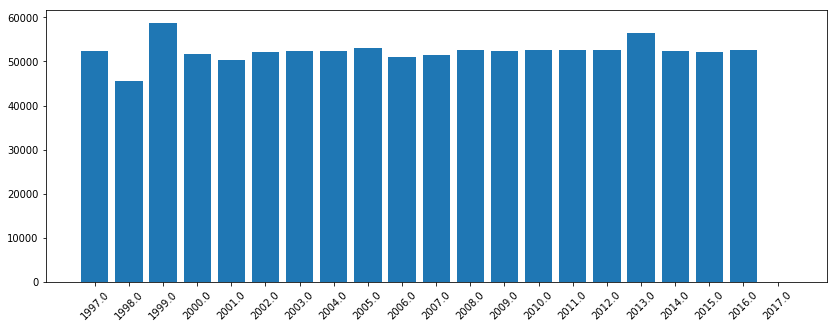

In [10]:
#Volumetry
volumetry(base_v1, 'Ano')

In [11]:
#Volumetry difference 
base.shape[0] - base_v1.shape[0]

862

# Air moisture

In [12]:
base_v2 = base_v1.loc[(base_v1['Umidade relativa Média (%)'] >= 0) & (base_v1['Umidade relativa Média (%)'] <= 100), :]

In [14]:
#Variable intervals before
info_var(base_v1,'Umidade relativa Média (%)')

The variable Umidade relativa Média (%) mean is 74.04371444805736 +- 26.61048731767592 
The min is -6371.0 and the maxi is 6836.0


In [15]:
#Variable intervals after
info_var(base_v2,'Umidade relativa Média (%)')

The variable Umidade relativa Média (%) mean is 74.02907690000264 +- 18.813048932048453 
The min is 7.41 and the maxi is 100.0


The full volumetry is  1046788

The volumetry per month is  49847.047619


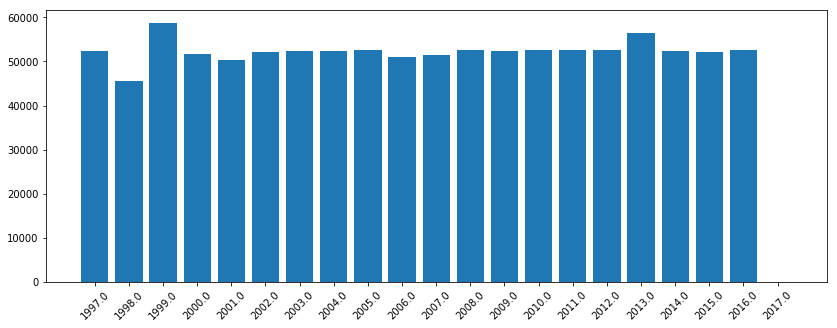

In [18]:
volumetry(base_v2, 'Ano')

In [16]:
#Volumetry difference 
base_v1.shape[0] - base_v2.shape[0]

377

# Air pression

In [19]:
base_v3 = base_v2.loc[(base_v2['Pressão (hPa)'] >= 822) & (base_v2['Pressão (hPa)'] <= 1030), :]

In [20]:
#Variable intervals before
info_var(base_v2,'Pressão (hPa)')

The variable Pressão (hPa) mean is 946.536023196674 +- 78.69648478565696 
The min is -6999.0 and the maxi is 2802.0


In [21]:
#Variable intervals after
info_var(base_v3,'Pressão (hPa)')

The variable Pressão (hPa) mean is 947.304604268704 +- 6.6342131718073585 
The min is 822.0 and the maxi is 1028.0


The full volumetry is  1046594

The volumetry per month is  49837.8095238


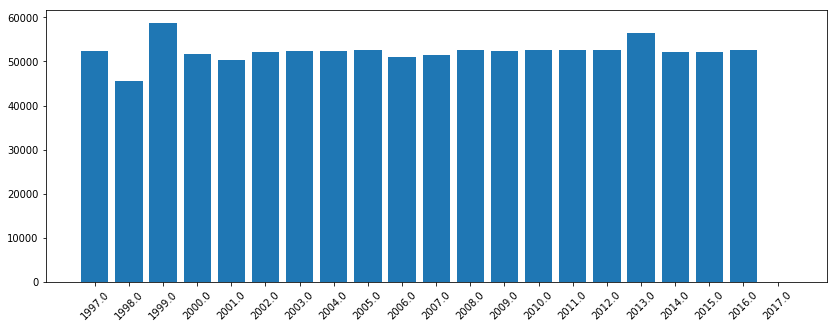

In [22]:
volumetry(base_v3, 'Ano')

In [23]:
#Volumetry difference 
base_v2.shape[0] - base_v3.shape[0]

194

# Wind direction

In [24]:
base_v4 = base_v3.loc[(base_v3['Direção do Vento no instante da aquisição (°)'] >= 0) & (base_v3['Direção do Vento no instante da aquisição (°)'] <= 360), :]

In [26]:
#Variable intervals before
info_var(base_v3,'Direção do Vento no instante da aquisição (°)')

The variable Direção do Vento no instante da aquisição (°) mean is 271.94631508779906 +- 669.2521355253434 
The min is 0.0 and the maxi is 6999.0


In [27]:
#Variable intervals after
info_var(base_v4,'Direção do Vento no instante da aquisição (°)')

The variable Direção do Vento no instante da aquisição (°) mean is 165.95483099363923 +- 97.79135009516013 
The min is 0.0 and the maxi is 360.0


The full volumetry is  1013879

The volumetry per month is  48279.952381


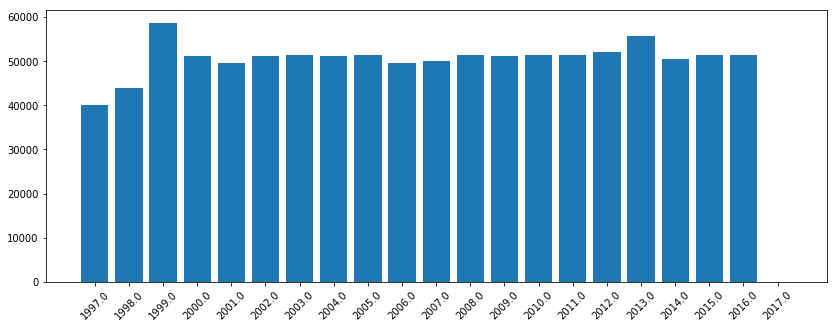

In [28]:
volumetry(base_v4, 'Ano')

In [29]:
#Volumetry difference 
base_v3.shape[0] - base_v4.shape[0]

32715

# Summary

In [30]:
#Summary

#Observation removed
qtde = base.shape[0] - base_v4.shape[0]

percent = 100*qtde/base.shape[0]

percent = round(percent,2)

print(f"{qtde} observations were removed what is {percent}% of the dataset")

34148 observations were removed what is 3.26% of the dataset


# Adding control variables of month and week

In [32]:
# Defining functions

#Function that gets month
def get_month(day):
    if((day>0) & (day <= 31)):
        return 1
    elif((day>31) & (day <= 59)):
        return 2
    elif((day>59) & (day <= 90)):
        return 3
    elif((day>90) & (day <= 120)):
        return 4
    elif((day>120) & (day <= 151)):
        return 5
    elif((day>151) & (day <= 181)):
        return 6
    elif((day>181) & (day <= 212)):
        return 7
    elif((day>212) & (day <= 243)):
        return 8
    elif((day>243) & (day <= 273)):
        return 9
    elif((day>273) & (day <= 304)):
        return 10
    elif((day>304) & (day <= 334)):
        return 11
    else:
        return 12
    
#Function that gets week
def get_week(days):
    return np.floor(days/7)

In [38]:
base_v4['month'] = base_v4['Dia Juliano'].map(get_month)
base_v4['week'] = base_v4['Dia Juliano'].map(get_week)

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
print(base_v4.month.unique())
print(base_v4.month.nunique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
12


In [41]:
print(base_v4.week.unique())
print(base_v4.week.nunique())

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.]
53


In [43]:
#Exporting dataset

base_v4.to_csv("clean_base111_v2.csv")